# Introduction to Time Series Analysis and Forecasting

In [33]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

## Descriptive Statistics

Descriptive statistics are a set of values and coefficients that summarize a dataset. It provides information about central tendency and variability with regard to that obtained center.

## Inferential Statistics

In [26]:
!wget -O "co2.csv" "ftp://data.iac.ethz.ch/CMIP6/input4MIPs/UoM/GHGConc/CMIP/mon/atmos/UoM-CMIP-1-1-0/GHGConc/gr3-GMNHSH/v20160701/mole_fraction_of_carbon_dioxide_in_air_input4MIPs_GHGConcentrations_CMIP_UoM-CMIP-1-1-0_gr3-GMNHSH_000001-201412.csv"

--2022-05-08 06:16:35--  ftp://data.iac.ethz.ch/CMIP6/input4MIPs/UoM/GHGConc/CMIP/mon/atmos/UoM-CMIP-1-1-0/GHGConc/gr3-GMNHSH/v20160701/mole_fraction_of_carbon_dioxide_in_air_input4MIPs_GHGConcentrations_CMIP_UoM-CMIP-1-1-0_gr3-GMNHSH_000001-201412.csv
           => ‘co2.csv’
Resolving data.iac.ethz.ch (data.iac.ethz.ch)... 129.132.165.61
Connecting to data.iac.ethz.ch (data.iac.ethz.ch)|129.132.165.61|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /CMIP6/input4MIPs/UoM/GHGConc/CMIP/mon/atmos/UoM-CMIP-1-1-0/GHGConc/gr3-GMNHSH/v20160701 ... done.
==> SIZE mole_fraction_of_carbon_dioxide_in_air_input4MIPs_GHGConcentrations_CMIP_UoM-CMIP-1-1-0_gr3-GMNHSH_000001-201412.csv ... 2157163
==> PASV ... done.    ==> RETR mole_fraction_of_carbon_dioxide_in_air_input4MIPs_GHGConcentrations_CMIP_UoM-CMIP-1-1-0_gr3-GMNHSH_000001-201412.csv ... done.
Length: 2157163 (2.1M) (unauthoritative)

mole_fraction_of_ca 100%[=

In [36]:
fname = os.path.join("co2.csv")

with open(fname) as f:
    data = f.read()

print(data[:1000])

datenum,year,month,day,datetime,data_mean_global,data_mean_nh,data_mean_sh
15,0,1,15,15-Jan-0000 00:00:00,278.36643883702,279.045658780349,277.687218893691
46,0,2,15,15-Feb-0000 00:00:00,278.713058010423,279.665398244509,277.760717776336
75,0,3,15,15-Mar-0000 00:00:00,279.013835279965,280.266778934527,277.760891625404
106,0,4,15,15-Apr-0000 00:00:00,279.209613348565,280.756607013125,277.662619684006
136,0,5,15,15-May-0000 00:00:00,279.106444207592,280.613494034269,277.599394380916
167,0,6,15,15-Jun-0000 00:00:00,278.325599529745,279.051002104382,277.600196955108
197,0,7,15,15-Jul-0000 00:00:00,276.637022486192,275.720930092582,277.553114879802
228,0,8,15,15-Aug-0000 00:00:00,274.98579282131,272.611740627628,277.359845014992
259,0,9,15,15-Sep-0000 00:00:00,274.898510607813,272.662073350643,277.134947864983
289,0,10,15,15-Oct-0000 00:00:00,275.889830222667,274.725710029604,277.05395041573
320,0,11,15,15-Nov-0000 00:00:00,276.851702631043,276.562272881883,277.141132380204
350,0,12,15,15-D

In [38]:
co2_dataset = pd.read_csv("co2.csv")
co2_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24180 entries, 0 to 24179
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datenum           24180 non-null  int64  
 1   year              24180 non-null  int64  
 2   month             24180 non-null  int64  
 3   day               24180 non-null  int64  
 4   datetime          24180 non-null  object 
 5   data_mean_global  24180 non-null  float64
 6   data_mean_nh      24180 non-null  float64
 7   data_mean_sh      24180 non-null  float64
dtypes: float64(3), int64(4), object(1)
memory usage: 1.5+ MB


For this section, we will use a dataset that retraces the historical concentration of CO2 in the atmosphere. Since the dataset spans 2014 years of history, let’s just consider data from 1950 and onward.

In [40]:
co2_dataset = co2_dataset.loc[co2_dataset.year > 1950]

In [43]:
co2_dataset = co2_dataset.groupby("year")['data_mean_global'].mean().reset_index()

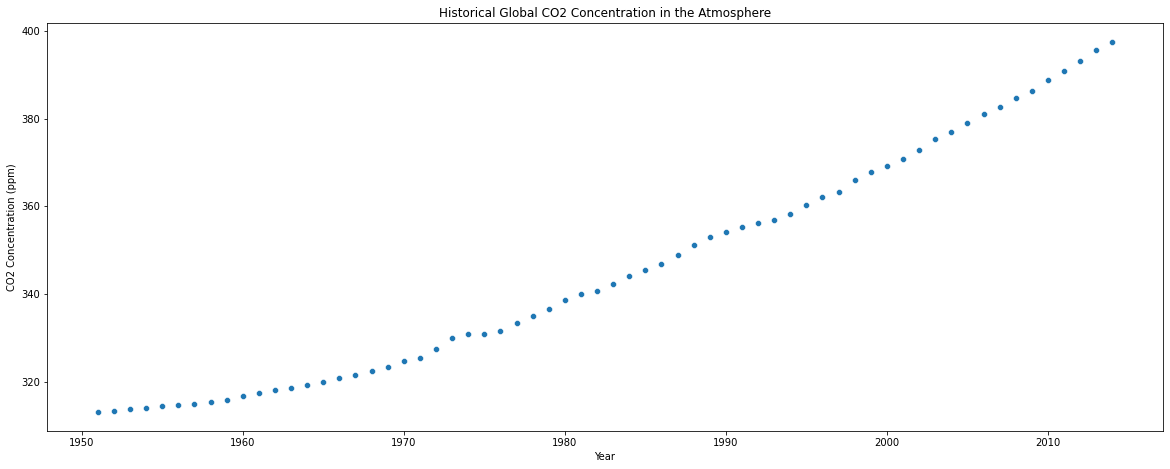

In [44]:
plt.figure(figsize=[20, 7.5]); # Set dimensions for figure
# Let's only consider the data from the year 1950
X = co2_dataset['year'].values
y = co2_dataset['data_mean_global'].values
sns.scatterplot(x=X, y=y);
plt.title('Historical Global CO2 Concentration in the Atmosphere');
plt.ylabel('CO2 Concentration (ppm)');
plt.xlabel('Year');

As you can see, it seems that the concentration is increasing over time.

Although the trend does not seem to be linear, it can probably still explain part of the variability of the data. Therefore, let’s make the following assumption:

The CO2 concentration depends on time in a linear way, with some errors
Mathematically, this is expressed as $y = (\beta_0 + \beta_1 x) + ϵ$
And you should easily recognize this as a linear equation with a constant term, a slope, and an error term.

It is important to note that when doing a simple linear regression, the following assumptions are made:

- the errors are normally distributed, and on average 0
- the errors have the same variance (homoscedastic)
- the errors are unrelated to each other
However, none of these assumptions are technically used when performing a simple linear regression. We are not generating normal distributions of the error term to estimate the parameters of our linear equation.

Instead, the ordinary least squares (OLS) is used to estimate the parameters. This is simply trying to find the minimum value of the sum of the squared error:

$$Q = \frac{1}{m}Σ (\text{Observed} - \text{Predicted})^2$$

The slope is 1.3753235369258405 and the intercept is -2380.823351611412


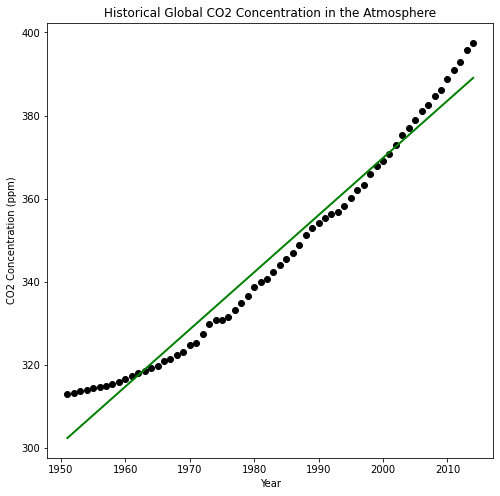

In [49]:
X = co2_dataset['year'].values.reshape(-1, 1)
y = co2_dataset['data_mean_global'].values.reshape(-1, 1)
reg = LinearRegression()
reg.fit(X, y)
print(f"The slope is {reg.coef_[0][0]} and the intercept is {reg.intercept_[0]}")
predictions = reg.predict(X.reshape(-1, 1))
plt.figure(figsize=(8, 8))
plt.scatter(X, y,c='black')
plt.plot(X, predictions, c='green', linewidth=2);
plt.title('Historical Global CO2 Concentration in the Atmosphere');
plt.ylabel('CO2 Concentration (ppm)');
plt.xlabel('Year');
plt.show();

### Assessing the quality of the model
From the graph, we can visually say the a straight line is not the best fit to our data, but it is not the worst either.

Recall the assumption of a linear model that the errors are normally distributed. We can check this assumption by plotting a QQ-plot of the residuals.

A QQ-plot is a scatter plot of quantiles from two different distributions. If the distributions are the same, then we should see a straight line.

Therefore, if we plot a QQ-plot of our residuals against a normal distribution, we can see if they fall on a straight line; meaning that our residuals are indeed normally distributed.

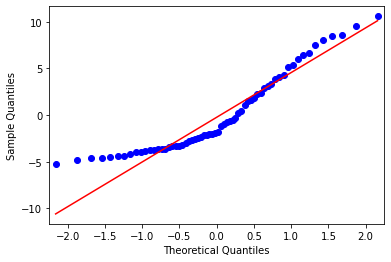

In [52]:
X = sm.add_constant(co2_dataset['year'].values)
model = sm.OLS(co2_dataset['data_mean_global'].values, X).fit()
residuals = model.resid
qq_plot = sm.qqplot(residuals, line='q')
plt.show();

As you can see, the blue dots represent the residuals, and they do not fall on a straight line. Therefore, they are not normally distributed, and this is an indicator that a linear model is not the best fit to our data.

This can be further supported by plotting a histogram of the residuals:

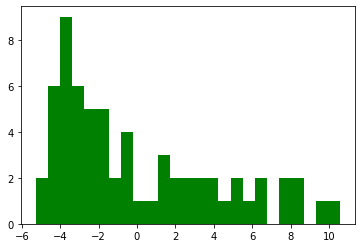

In [55]:
X = sm.add_constant(co2_dataset['year'].values)
model = sm.OLS(co2_dataset['data_mean_global'].values, X).fit()
residuals = model.resid
plt.hist(residuals, color="green", bins=25);

Again, we can clearly see that it is not a normal distribution.

#### Hypothesis testing
A major component of inferential statistics is hypothesis testing. This is a way to determine if the observed trend is due to randomness, or if there is a real statistical significance.

For hypothesis testing, we must define a hypothesis and a null hypothesis. The hypothesis is usually the trend we are trying to extract from data, while the null hypothesis is its exact opposite.

Let’s define the hypotheses for our case:

hypothesis: there is a linear correlation between time and CO2 concentration
null hypothesis: there is no linear correlation between time and CO2 concentration
Awesome! Now, let’s fit a linear model to our dataset using another library that will automatically run hypothesis tests for us:

In [56]:
X = sm.add_constant(co2_dataset['year'].values)
model = sm.OLS(co2_dataset['data_mean_global'].values, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     2219.
Date:                Sun, 08 May 2022   Prob (F-statistic):           2.96e-50
Time:                        06:48:13   Log-Likelihood:                -183.36
No. Observations:                  64   AIC:                             370.7
Df Residuals:                      62   BIC:                             375.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2380.8234     57.881    -41.133      0.0

Now, there is a lot of information here, but let’s consider only a few numbers.

First, we have a very high R² value of 0.971. This means that more than 97% of the variability in CO2 concentration is explained with the time variable.

Then, the F-statistic is very large as well: 2073. This means that there is statistical significance that a linear correlation exists between time and CO2 concentration.

Finally, looking at the p-value of the slope coefficient, you notice that it is 0. While the number is probably not 0, but still very small, it is another indicator of statistical significance that a linear correlation exists.

Usually, a threshold of 0.05 is used for the p-value. If less, the null hypothesis is rejected.

Therefore, because of a large F-statistic, in combination with a small p-value, we can reject the null hypothesis.